# Recursión y *backtracking*

Una función recursiva se llama a sí misma para resolver un problema más pequeño.

<img style="display:block;margin:auto" src="http://xkcdsw.com/content/img/1105.gif">

<div style="font-size:80%;text-align:center">Fuente: <a href="http://xkcdsw.com/1105">xkcdsw.com</a></div>


> *Students learning about recursion are sometimes* encouraged to **trace all the invocations** *of a recursive function on a piece of paper. … This exercise could be* **misleading**: *a programmer defining a recursive function usually* **does not think explicitly** *about the sequence of invocations that results from calling it. … How do you visualize all those invocations? You don’t have to.*
> <div style="text-align:right">Paul Graham</div>

## Ventajas de la recursión
1. Las funciones recursivas facilitan hacer código limpio y elegante.
1. Es una expresión natural de la estrategia *divide y vencerás*
1. La generación de secuencias es más fácil con recursión que con bucles anidados.

## Desventajas de la recursión
1. A veces la lógica del programa puede hacerse difícil de seguir.
1. Las llamadas recursivas son caras (*ineficientes*). Consumen tiempo y memoria.
1. Las funciones recursivas son difíciles de depurar.

In [1]:
from IPython.display import HTML, SVG, display
from math import pi, sin, cos

home_point = (0,600//3)

def forward(puntos):
    global current_pos, current_drawing
    pos1 = current_pos
    skip(puntos)
    current_drawing += line(pos1, current_pos)
        
def skip(puntos):
    global current_pos, current_angle
    x, y = current_pos
    current_pos = x + puntos*cos(current_angle), y + puntos*sin(current_angle)

def rotate(radianes):
    global current_angle
    current_angle += radianes

def home():
    global current_pos, current_angle
    current_pos = home_point
    current_angle = 0.

def clear():
    global current_drawing
    current_drawing = ''
    home()

def show():
    global current_drawing
    ret = SVG('''<svg width="100%" height="{}"
                      xmlns="http://www.w3.org/2000/svg">{}</svg>'''\
               .format(home_point[1]+10, current_drawing))
    clear()
    return ret

def line(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return '''<line x1="{}" y1="{}" 
                    x2="{}" y2="{}" 
                    stroke-width="1" stroke="black"/>'''.format(x1,y1,x2,y2)

clear()

# Ejemplo: La curva de Koch

Empezamos con una simple línea

In [3]:
forward(400)
show()

La secuencia básica de la curva de Koch consta de 4 repeticiones en distinta orientación.

In [4]:
def koch0(L):
    for angle in (-pi/3, 2*pi/3, -pi/3, 0):
        forward(L/3)
        rotate(angle)
koch0(400)
show()

Pero la curva de Koch repite la misma secuencia sobre sí misma.

In [5]:
def koch1(L):
    for angle in (-pi/3, 2*pi/3, -pi/3, 0):
        koch0(L/3)
        rotate(angle)
koch1(400)
show()

No una vez, sino una y otra vez.

In [221]:
def koch2(L):
    for angle in (-pi/3, 2*pi/3, -pi/3, 0):
        koch1(L/3)
        rotate(angle)
koch2(400); show()

Es más fácil usando recursión:
* Dibuja la curva dibujando 4 veces la curva de Koch
* Hasta el límite de lo visible.

In [6]:
def koch(L):
    if L < 1: forward(L); return
    for angle in (-pi/3, 2*pi/3, -pi/3, 0):
        koch(L/3)
        rotate(angle)
koch(400); show()

## Recursión ingenua

In [223]:
def fib(n, nivel=0):
    if n==0 or n==1:
        print(" "*nivel,"fib({}) = {}".format(n, 1))
        return 1
    print(" "*nivel,"fib({}) [".format(n))
    result = fib(n-1,nivel+4) + fib(n-2,nivel+4)
    print(" "*nivel,"] = {}".format(n,result))
    return result

In [224]:
fib(5)

 fib(5) [
     fib(4) [
         fib(3) [
             fib(2) [
                 fib(1) = 1
                 fib(0) = 1
             ] = 2
             fib(1) = 1
         ] = 3
         fib(2) [
             fib(1) = 1
             fib(0) = 1
         ] = 2
     ] = 4
     fib(3) [
         fib(2) [
             fib(1) = 1
             fib(0) = 1
         ] = 2
         fib(1) = 1
     ] = 3
 ] = 5


8

In [7]:
def fib(n):
    if n < 2: return 1
    return fib(n-1) + fib(n-2)

In [8]:
%time fib(35)

Wall time: 6.62 s


14930352

## Memoization

In [9]:
from functools import lru_cache

@lru_cache()
def fib(n):
    if n < 2: return 1
    return fib(n-1) + fib(n-2)

In [14]:
%time fib(1350)

Wall time: 0 ns


983596501957170863636436804965858881371515533193099965549469835883966880040384038329119567823640199314246244146282473572957257254318756001984777891448344257925791401174143546511244313811567881750865492906124875788226375268699904420828121422532903191307708278479078495723913428427149

## Ejercicio: Triángulo de Sierpinski

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/Sierpinski_segmentos.png">

In [17]:
def sierpinski(L):
    if L<4: triangle(L); return
    for i in range(3):
        skip(L)
        rotate(-2*pi/3)
        sierpinski(L/2)

def triangle(L):
    for i in range(3):
        forward(L)
        rotate(-2*pi/3)

sierpinski(200); show()
#triangle(3); show()

# Ejemplo: Fractales de Barnsley



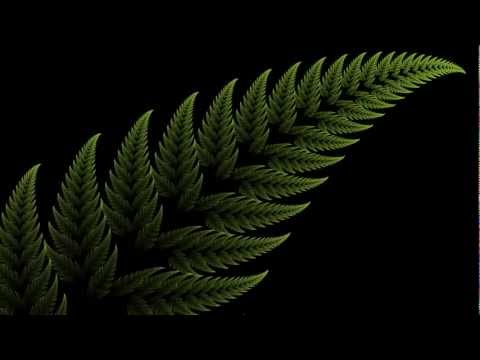

In [54]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('vDfgMqGbotU')

## Dibujar imágenes en Python

* Mostrar una matriz de valores entre 0 y 1 (*NumPy*) como un PNG

In [22]:
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

def showarray(a):
    a = np.uint8(np.clip(a * 255, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

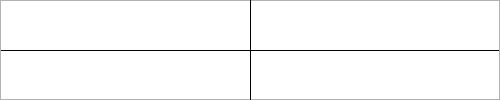

In [23]:
img = np.full((100,500), 1.)
for i in range(500): img[50][i] = 0. ; img[0][i] = img[99][i] = 0.7
for i in range(100): img[i][250] = 0. ; img[i][0] = img[i][499] = 0.7
showarray(img)

## El método de Barnsley

$$ 
\begin{bmatrix}
    x_n  \\
    y_n  
\end{bmatrix} =
\begin{bmatrix}
    a & b  \\
    c & d 
\end{bmatrix} \cdot 
\begin{bmatrix}
    x_{n-1}  \\
    y_{n-1}  
\end{bmatrix} +
\begin{bmatrix}
    e  \\
    f  
\end{bmatrix} 
$$


| *p* | *a* | *b* | *c* | *d* | *e* | *f* |
|---|---|---|---|---|---|---|
|0.02|  0.0|   0.0|    0.0|   0.27|  0.5|    0.0|
|0.15| -0.139| 0.263|  0.246| 0.224| 0.57|  -0.036|
|0.13|  0.17| -0.215|  0.222| 0.176| 0.408|  0.0893|
|0.7|   0.781| 0.034| -0.032| 0.739| 0.1075| 0.27|



El método consiste en aplicar sucesivamente una transformación afín a un punto inicial.  La transformación afín se elige de entre un conjunto limitado con una probabilidad (*p*) determinada.  Para representarlo basta calcular en qué pixel cae cada uno de los puntos del método.  Para mayor flexibilidad aplicaremos una última transformación afín para poder desplazar y rotar adecuadamente la figura generada.

In [24]:
def barnsley_fern(data):
    height, width = 500, 500
    img = np.full((height, width),1.)
    for v in barnsley_points(data['coefs']):
        y,x = affine_transform(v, data['affine'])
        img[int(y) % height][int(x) % width] = 0.
    showarray(img)

def barnsley_points(coefs):
    v = .5, .0
    for i in range(1000000):
        yield v
        v = barnsley_transform(v, coefs)

In [25]:
helecho1 = {
    'coefs': (
        (.01,  .0,   .0,   .0,  .16, .0,  .0),
        (.85,  .85,  .04, -.04, .85, .0, 1.6),
        (.07,  .20, -.26,  .23, .22, .0, 1.6),
        (.07, -.15,  .28,  .26, .24, .0,  .44)
    ),
    'affine': (0., -45., 45., 0., 0., 200.)
}

In [26]:
import random

def barnsley_transform(v, coefs):
    rand = random.uniform(0,1)
    for r in coefs:
        if rand < r[0]:
            return affine_transform(v, r[1:])
        rand -= r[0]
    raise ValueError('Las probabilidades deben sumar 1')

def affine_transform(v, a):
    return v[0]*a[0] + v[1]*a[1] + a[4], \
           v[0]*a[2] + v[1]*a[3] + a[5]

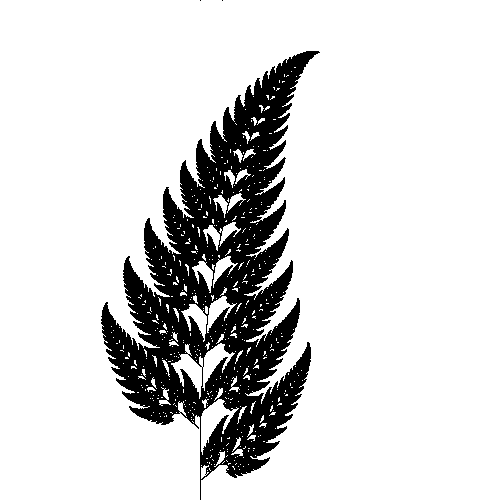

In [27]:
barnsley_fern(helecho1)

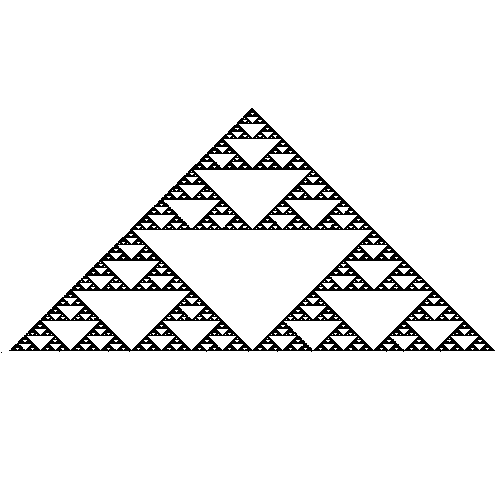

In [29]:
helecho2 = {
    'coefs': (
        (.02,  .0,   .0,    .0,  .27,   .5,    .0),
        (.15, -.139, .263,  .246, .224, .57,  -.036),
        (.13,  .17, -.215,  .222, .176, .408,  .0893),
        (.7,   .781, .034, -.032, .739, .1075, .27)
    ),
    'affine': (0., -480., 480., 0., 0., 0.)
}

from math import cos, sin, pi

sierpinski = {
    'coefs': (
        (.33, .5, .0, .0, .5,  1.,  1.),
        (.33, .5, .0, .0, .5,  1., 50.),
        (.34, .5, .0, .0, .5, 50., 50.)
    ),
    'affine': (3.5*sin(pi/4), -3.5*cos(pi/4), 3.5*cos(pi/4), 3.5*sin(pi/4), -150, 0)
}

barnsley_fern(sierpinski)

# Créditos

Basado en http://web.eecs.umich.edu/~aprakash/eecs282/lectures/11-recursion.pdf
